In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
mnist = fetch_mldata('MNIST original',data_home='./dataset')

In [2]:
def stdand(data):
    import sys
    std = np.std(data,axis = 0)+sys.float_info.min
    mean = np.mean(data,axis = 0)
    data = (data-mean)/std
    return data,mean,std

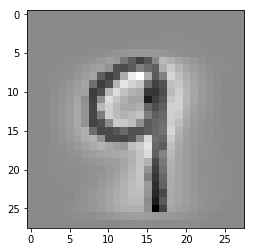

In [3]:
X, y = mnist["data"], mnist["target"]
data =X[56000:57000]
data = data.astype(np.float64)
data,mean,std = stdand(data)

plt.imshow(data[-1].reshape(28,28), cmap = matplotlib.cm.binary,interpolation="nearest")
#plt.imshow(mean.reshape(28,28), cmap = matplotlib.cm.gray,interpolation="nearest")

c = np.dot(data.T,data)/100
s,u = np.linalg.eig(c)



/home/wanghualiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


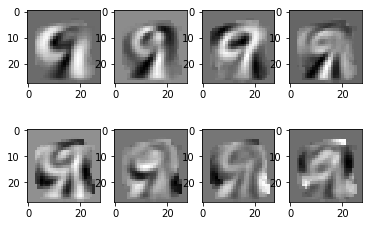

In [15]:
def f_map(feature):
    index_max,index_min = np.argmax(feature),np.argmin(feature)
    v_max,v_min = feature[index_max],feature[index_min]
    return (feature-v_min)/(v_max-v_min)*255
for i in range(8):
    plt.subplot(241+i)
    f =f_map(u[:,0+i])
    f = f.astype(np.int)
    plt.imshow(f.reshape(28,28), cmap = matplotlib.cm.gray,interpolation="nearest")

In [5]:
def test_pca(data,b,k):
    test = data[57002:57002+b]
    z = np.dot(test,u[:,:k])
    x_re = np.dot(z,u[:,:k].T)
    string = eval(str(b)+'21')
    
    for i in range(b):
        plt.subplot(string+i*2)
        plt.imshow(test[i].reshape(28,28), cmap = matplotlib.cm.gray,interpolation="nearest")
        plt.subplot(string+i*2+1)
        f = x_re[i]*std+mean
        f = f.astype(np.int)
        plt.imshow(f.reshape(28,28), cmap = matplotlib.cm.gray,interpolation="nearest")

/home/wanghualiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


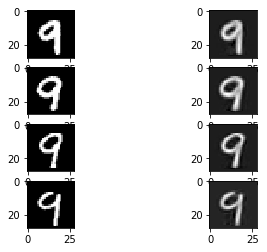

In [19]:
test_pca(X,4,100)